In [1]:
# We need to read our data from the excel sheets we acquired from the LCRA
# Import Pandas to do so
import pandas as pd
data = pd.read_csv('WCDATA2_Reversed.csv')
data.head() # Quick check to see the top of our data

,Date - Time (23),Count (23),Rainfall (23),Date - Time 2 (23),Stage (23),Flow (23),Actual Count,Date - Time (45),Count (45),Rainfall (45)
0,11/12/15 15:27,0.0,0.0,11/12/15 15:27,1.47,4,1,11/12/15 15:22,7.76,0.0
1,11/12/15 15:42,0.0,0.0,11/12/15 15:42,1.47,4,2,11/12/15 15:37,7.76,0.0
2,11/12/15 15:57,0.0,0.0,11/12/15 15:57,1.47,4,3,11/12/15 15:52,7.76,0.0
3,11/12/15 16:12,0.0,0.0,11/12/15 16:12,1.46,4,4,11/12/15 16:07,7.76,0.0
4,11/12/15 16:27,0.0,0.0,11/12/15 16:27,1.46,4,5,11/12/15 16:22,7.76,0.0


In [2]:
# Visually represent the data in order to see any patterns or correlations
import seaborn as sns
import matplotlib.pyplot as plt
# Allow plots to appear within the notebook
%matplotlib inline

In [14]:
# Let's only get the varaiables that matter which are the rainfall counts
X = data[['Rainfall (23)', 'Rainfall (45)']]
X.head() # Check our data to see if stored correctly

,Rainfall (23),Rainfall (45)
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


In [15]:
# Store results in y
y = data['Stage (23)'] # This command is only possible if the y variable you want is a single word
y.head() # Check again

0    1.47
1    1.47
2    1.47
3    1.46
4    1.46
Name: Stage (23), dtype: float64

In [16]:
# Import the necessary packages needed to use K-fold cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np

In [17]:
# Instantiate our linear regression model
from sklearn.linear_model import LinearRegression
linReg = LinearRegression()
scores = cross_val_score(linReg, X, y, cv = 10, scoring ='neg_mean_squared_error')
print scores

[-0.04542735 -0.08170524 -0.19885058 -0.21536348 -0.06987579 -0.10800115
 -0.06208044 -0.05839728 -0.07088843 -0.15010488]


In [18]:
# The scores are negative which does not help us so let's flip the sign
mse_scores = -scores
print mse_scores

[ 0.04542735  0.08170524  0.19885058  0.21536348  0.06987579  0.10800115
  0.06208044  0.05839728  0.07088843  0.15010488]


In [19]:
# Now we need to convert our mean squared error values to root squared mean error
rmse_scores = np.sqrt(mse_scores)
print rmse_scores

[ 0.21313693  0.28584128  0.44592666  0.46407271  0.2643403   0.32863528
  0.24915947  0.2416553   0.26624881  0.38743371]


In [20]:
# Now we need the average of the RMSE of the 10 folds
print rmse_scores.mean()

0.314645044114


In [21]:
# What I learned that the K-fold cross validation does not actually train the algorithm
# However, it allows you to see how well your model would do if it was trained and tested with all possible data
# Therefore we can now train our linear regression model with all our data since we know the average RMSE
linReg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
i = 0;
predictions = []
while(i < 68358): #Hardcoded value until I can figure out how to extract the exact count
    data2 = data.iloc[[i]] # Get the row we need to make our prediction on
    X2 = data2[['Rainfall (23)', 'Rainfall (45)']]
    predictions.append(linReg.predict(X2))
    i = i + 1
print 'done'

done


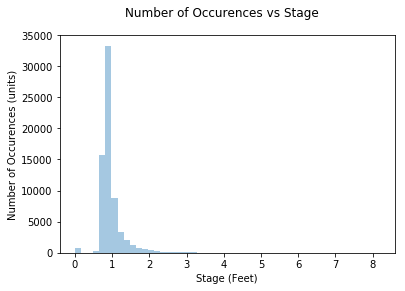

In [25]:
sns.distplot(data['Stage (23)'], kde = False, norm_hist = False)
plt.suptitle('Number of Occurences vs Stage')
plt.ylabel('Number of Occurences (units)')
plt.xlabel('Stage (Feet)')

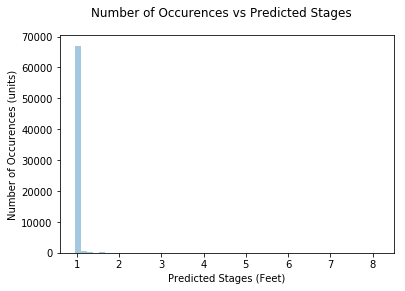

In [26]:
sns.distplot(predictions, kde = False, norm_hist = False, axlabel = "Predicted Stages (Feet)")
plt.suptitle('Number of Occurences vs Predicted Stages')
plt.ylabel('Number of Occurences (units)')

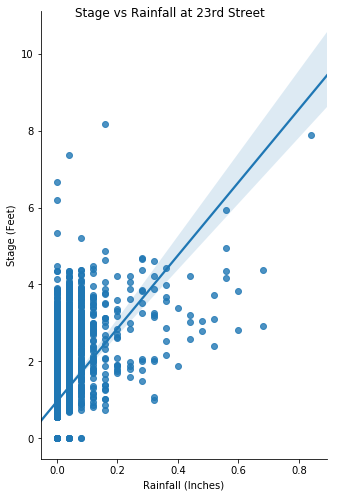

In [28]:
sns.pairplot(data, x_vars = ['Rainfall (23)'], y_vars = 'Stage (23)', size = 7, aspect = 0.7, kind='reg')
plt.suptitle('Stage vs Rainfall at 23rd Street')
plt.ylabel('Stage (Feet)')
plt.xlabel('Rainfall (Inches)')

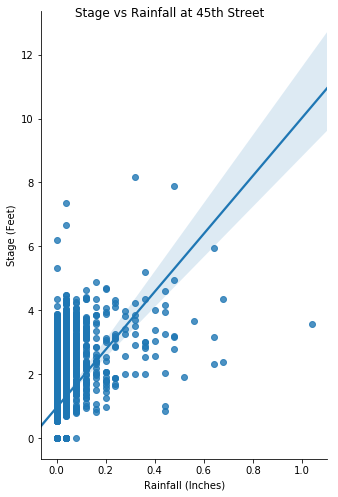

In [29]:
sns.pairplot(data, x_vars = ['Rainfall (45)'], y_vars = 'Stage (23)', size = 7, aspect = 0.7, kind='reg')
plt.suptitle('Stage vs Rainfall at 45th Street')
plt.ylabel('Stage (Feet)')
plt.xlabel('Rainfall (Inches)')

In [30]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

/Users/robgutierrez/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [31]:
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Stage (23)   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     1661.
Date:                Sat, 25 Nov 2017   Prob (F-statistic):               0.00
Time:                        14:30:53   Log-Likelihood:                -97375.
No. Observations:               68358   AIC:                         1.948e+05
Df Residuals:                   68356   BIC:                         1.948e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Rainfall (23)     8.8877      0.417     21.313      0.000       8.070       9.705
Rainfall (45)     7.6100      0.404     18.845      0.000       6.819       8.401
==============================================================================
Omnibus:                    22611.936   Durbin-Watson:                   0.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7137804.920
Skew:                           0.015   Prob(JB):                         0.00
Kurtosis:                      53.060   Cond. No.                         2.69
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

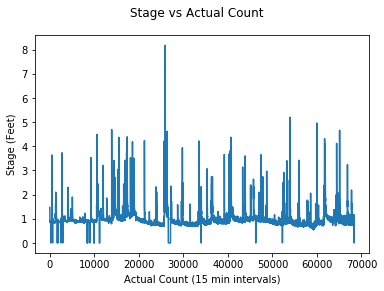

In [32]:
plt.plot(data['Stage (23)'])
plt.suptitle('Stage vs Actual Count')
plt.ylabel('Stage (Feet)')
plt.xlabel('Actual Count (15 min intervals)')

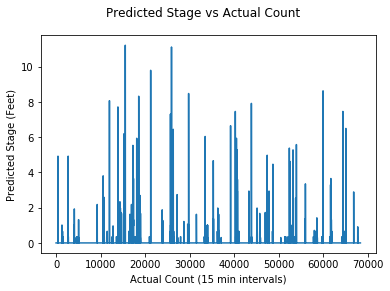

In [33]:
plt.plot(predictions)
plt.suptitle('Predicted Stage vs Actual Count')
plt.ylabel('Predicted Stage (Feet)')
plt.xlabel('Actual Count (15 min intervals)')